# EDA with Pandas

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


### General Analysis:
Per our analysis, there are 333 records, of those records, there is no missing data, which helps to avoid any skewing due to null data. From this data, we can determine some basic information:

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


### Data Manipulation:
As of right now, the column titled 'b' is in a scale that isn't particularly accessible, so we'll convert it to something a bit more understandable. 

Currently, it's in the format x = 1000 (Bk - .63)^2

What we'll do is take each value and reverse this formula, to get the proportion in a more understandable scale.

In [5]:
def b_convert(b_data):
    b_converted = ((b_data/1000.0)**(.5)) + .63
    return(b_converted)

df['b'] = df['b'].map(b_convert)

### Focused Analysis:
#### Race and Home Value:
Focusing in on the data, we can pull out both the proportion of African-American individuals per town and the average value of owner-occupied homes to compare the two and determine any correlation between them.

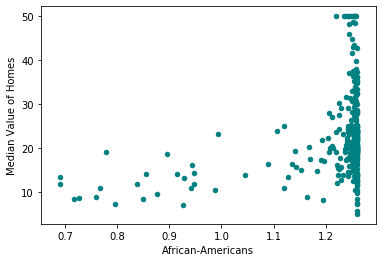

In [6]:
data = pd.DataFrame({'African-Americans':df['b'],
                    'Median Value of Homes':df['medv']})
                    
scatterplot = data.plot('African-Americans', 
                        'Median Value of Homes', 
                        kind='scatter',c ='Teal')

#### Race and Crime Rate:
Often, it is implied that race and crime rate are related, due to correlating data. The reality is, however, that there are a lot of other factors involved that include home value, taxes, pupil-teacher ratio (and therefore quality of education), and many other factors.

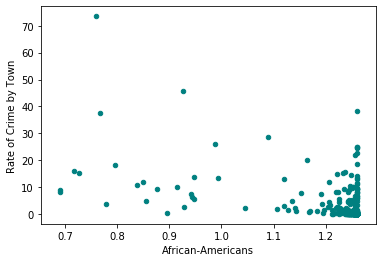

In [7]:
data = pd.DataFrame({'African-Americans':df['b'],
                    'Rate of Crime by Town':df['crim']})
                    
scatterplot = data.plot('African-Americans', 
                        'Rate of Crime by Town', 
                        kind='scatter',c ='Teal')

#### Crime Rate and Home Value:

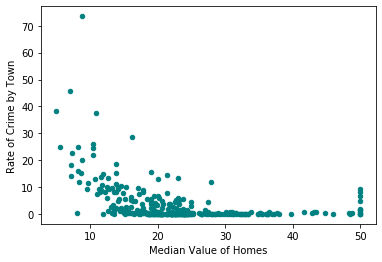

In [8]:
data = pd.DataFrame({'Median Value of Homes':df['medv'],
                    'Rate of Crime by Town':df['crim']})
                    
scatterplot = data.plot('Median Value of Homes', 
                        'Rate of Crime by Town', 
                        kind='scatter',c ='Teal')

#### Crime Rate and Pupil-Teacher Ratio
Note that in the below plot, there is a definite correlation between higher pupil-teacher ratios and higher crime rates, just as there was a direct correlation between higher crime rates and lower home values. This could be due to lower taxes being paid into public school systems and, therefore, lower available funds for teachers, or a lack of available teachers in the area.

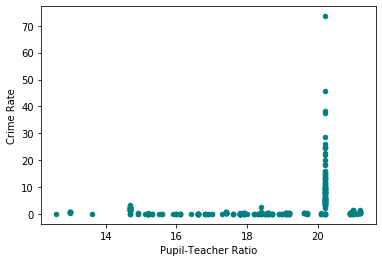

In [9]:
data = pd.DataFrame({'Pupil-Teacher Ratio':df['ptratio'],
                    'Crime Rate':df['crim'],})
                    
plot = data.plot('Pupil-Teacher Ratio', 
                'Crime Rate',
                 kind='scatter',
                c ='Teal')

# Remember Kids: Correlation does not equal causation!